In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Resultado Fiscal - último mes reportado 2019

## Resumen ejecutivo

In [27]:
#EL TEXTO PARA ARMAR DE FORMA AUTOMÁTICA- ** ver si dejarlo en formáto de código o armarlo en Markdown, en éste último caso, 
#BUSCAR!!**
print("Durante el mes de julio el Sector Público Nacional tuvo un superávit primario de $ 4.293 millones, lo que implica una mejora de $ 18.572 millones frente al déficit de $ 14.280 millones registrado en igual mes de 2018. Los recursos totales crecieron 61,6% en términos interanuales (i.a.), 11 puntos porcentuales (p.p.) más en relación a los gastos primarios que tuvieron un incremento de 50,5% i.a.")

Durante el mes de julio el Sector Público Nacional tuvo un superávit primario de $ 4.293 millones, lo que implica una mejora de $ 18.572 millones frente al déficit de $ 14.280 millones registrado en igual mes de 2018. Los recursos totales crecieron 61,6% en términos interanuales (i.a.), 11 puntos porcentuales (p.p.) más en relación a los gastos primarios que tuvieron un incremento de 50,5% i.a.


### Ingresos Totales (Formato IMIG)

In [46]:
# Armo los dataframes con los ids de los componentes de cada uno de los subtotales "tributarios", "rentas", "otros corrientes" y "capital"
 
it_tributarios= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_IVA_NETO_RROS_0_T_19_67,452.2_GANANCIASIAS_0_T_9_51,452.2_APORTES_COIAL_0_T_39_29,452.2_DEBITOS_CRTOS_0_T_16_22,452.2_BIENES_PERLES_0_T_17_26,452.2_IMPUESTOS_NOS_0_T_18_87,452.2_COMBUSTIBLLES_0_T_12_97,452.2_DERECHOS_EION_0_T_20_42,452.2_DERECHOS_IION_0_T_20_60,452.2_RESTO_TRIBIOS_0_T_17_0&limit=5000&format=csv")
it_rentas= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_FGS_COBRADERO_0_T_53_90,452.2_RESTO_RENTDAD_0_T_22_24&limit=5000&format=csv")
it_otros= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_INGRESOS_NIOS_0_T_23_2,452.2_TRANSFERENTES_0_T_25_22,452.2_RESTO_INGRTES_0_T_25_96&limit=5000&format=csv")
it_capital= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_INGRESOS_CTAL_0_T_16_75&limit=5000&format=csv")

# Transformo a formato de datetime y pongo como índice al campo "indice_tiempo"
it_tributarios.indice_tiempo= pd.to_datetime(it_tributarios.indice_tiempo)
it_rentas.indice_tiempo= pd.to_datetime(it_rentas.indice_tiempo)
it_otros.indice_tiempo= pd.to_datetime(it_otros.indice_tiempo)
it_capital.indice_tiempo= pd.to_datetime(it_capital.indice_tiempo)

it_tributarios= it_tributarios.set_index("indice_tiempo")
it_rentas= it_rentas.set_index("indice_tiempo")
it_otros= it_otros.set_index("indice_tiempo")
it_capital= it_capital.set_index("indice_tiempo")


In [100]:
cod_mes= {1: "enero",
    2: "febrero",
    3: "marzo",
    4: "abril",
    5: "mayo",
    6: "junio",
    7: "julio",
    8: "agosto",
    9: "septiembre",
    10: "octubre",
    11: "noviembre",
    12: "diciembre"}

rp=pd.read_csv("https://apis.datos.gob.ar/series/api/series/?&ids=452.3_RESULTADO_RIO_0_M_18_54&limit=5000&format=csv")

rp["indice_tiempo"] = pd.to_datetime(rp["indice_tiempo"])
rp=rp.set_index("indice_tiempo")


mes_actual= rp.index.max().month

## PARA CONSIDERAR SIEMPRE EL ÚLTIMO PERIODO DE LA SERIE Y EL DEL AÑO ANTERIOR GENERO LAS VARIABLES periodo_actual y periodo_anio_anterior
rp.index=rp.index.to_period()
periodo_actual = rp.index.max()
periodo_anio_anterior = periodo_actual - 12

rp=rp[(rp.index==periodo_anio_anterior)|(rp.index==periodo_actual)].pivot_table(columns="indice_tiempo")

rp["var%_anual"]= round( (rp[periodo_actual] / rp[periodo_anio_anterior]) - 1, 4) * 100
#rp.loc["resultado_primario",
rp
rp.columns = rp.columns.astype(str)
rp_actual=int(round(rp.loc["resultado_primario", str(periodo_actual)],0))
rp_anterior=int(round(rp.loc["resultado_primario", str(periodo_anio_anterior)],0))
dif= int(rp.loc["resultado_primario", str(periodo_actual)] - rp.loc["resultado_primario", str(periodo_anio_anterior)])
rp

indice_tiempo,2018-07,2019-07,var%_anual
resultado_primario,-14279.6,4292.8,-130.06


In [103]:

print("Durante el mes de {} el Sector Público Nacional tuvo un superávit primario de $ {} millones, lo que implica una mejora de $ {} millones frente al déficit de $ {} millones registrado en igual mes de {}.".format(cod_mes[mes_actual], rp_actual, dif, -rp_anterior ,it_tributarios.index.max().year-1))

Durante el mes de julio el Sector Público Nacional tuvo un superávit primario de $ 4293 millones, lo que implica una mejora de $ 18572 millones frente al déficit de $ 14280 millones registrado en igual mes de 2018.


In [5]:
#Como no contamos con los subtotales de Tributarios, Rentas, Otros Corrientes y capital para el armado del Resumen del mes IMIG,
#lo armamos trasponiendo los dataframe y sumando todos sus compoonentes. Esto nos va a permitir tener las series deseadas 
#y formar un dataframe con una estructura similar a la que queríamos llegar.

# it_tributarios.T.sum(), 
# it_rentas.T.sum(),
# it_otros.T.sum(),
# it_capital.T.sum(),
total=it_tributarios.T.sum() + it_rentas.T.sum() + it_otros.T.sum() + it_capital.T.sum()

# creamos un dataframe para Ingresos Totales con todos sus componentes. #VER COMO REORDENAR LAS FILAS!!!
ingresos_totales = pd.DataFrame({
    "I.a) Tributarios": it_tributarios.T.sum(), 
    "I.b) Rentas": it_rentas.T.sum(),
    "I.c) Otros_Corrientes": it_otros.T.sum(),
    "I.d) Capital": it_capital.T.sum(),
    "Total_Ingresos_Totales":total
})


ingresos_totales.index=ingresos_totales.index.to_period()

## PARA CONSIDERAR SIEMPRE EL ÚLTIMO PERIODO DE LA SERIE Y EL DEL AÑO ANTERIOR GENERO LAS VARIABLES periodo_actual y periodo_anio_anterior
periodo_actual = ingresos_totales.index.max()
periodo_anio_anterior = periodo_actual - 12

imig_it=ingresos_totales[(ingresos_totales.index==periodo_anio_anterior)|(ingresos_totales.index==periodo_actual)].pivot_table(columns="indice_tiempo")

imig_it["var%_anual"]= round( (imig_it[periodo_actual] / imig_it[periodo_anio_anterior]) - 1, 4) * 100

# Quisiera agregar la diferencia absoluta en $
# PORQUE NO ME SIRVE ÉSTA ASIGNACIÓN?? 
imig_it.columns = imig_it.columns.astype(str)
imig_it["var$_anual"]= imig_it[str(object= periodo_actual)] - imig_it[str(object=periodo_anio_anterior)]

imig_it= imig_it.rename(columns={"indice_tiempo": "Concepto"})
imig_it

# FALTARÍA ORDENAR LOS CONCEPTOS POR COMPONENTE (EL "TOTAL_INGRESOS_TOTALES DEBERÍA IR AL FINAL" y si es posible remarcar en negrita)

indice_tiempo,2018-07,2019-07,var%_anual,var$_anual
I.a) Tributarios,205571.6,314941.8,53.20,109370.2
I.b) Rentas,14605.1,27241.4,86.52,12636.3
I.c) Otros_Corrientes,7511.2,21290.9,183.46,13779.7
I.d) Capital,4931.0,12392.5,151.32,7461.5
Total_Ingresos_Totales,232618.9,375866.6,61.58,143247.7


In [ ]:
# Armo los dataframes con los ids de los componentes de cada uno de los subtotales "tributarios", "rentas", "otros corrientes" y "capital"
 
gtos_prestaciones_sociales= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_IVA_NETO_RROS_0_T_19_67,452.2_GANANCIASIAS_0_T_9_51,452.2_APORTES_COIAL_0_T_39_29,452.2_DEBITOS_CRTOS_0_T_16_22,452.2_BIENES_PERLES_0_T_17_26,452.2_IMPUESTOS_NOS_0_T_18_87,452.2_COMBUSTIBLLES_0_T_12_97,452.2_DERECHOS_EION_0_T_20_42,452.2_DERECHOS_IION_0_T_20_60,452.2_RESTO_TRIBIOS_0_T_17_0&limit=5000&format=csv")
gtos_subsidios= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_FGS_COBRADERO_0_T_53_90,452.2_RESTO_RENTDAD_0_T_22_24&limit=5000&format=csv")
gtos_otros= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_INGRESOS_NIOS_0_T_23_2,452.2_TRANSFERENTES_0_T_25_22,452.2_RESTO_INGRTES_0_T_25_96&limit=5000&format=csv")
gtos_capital= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_INGRESOS_CTAL_0_T_16_75&limit=5000&format=csv")

# Transformo a formato de datetime y pongo como índice al campo "indice_tiempo"
gtos_prestaciones_sociales.indice_tiempo= pd.to_datetime(it_tributarios.indice_tiempo)
gtos_subsidios.indice_tiempo= pd.to_datetime(it_rentas.indice_tiempo)
gtos_otros.indice_tiempo= pd.to_datetime(it_otros.indice_tiempo)
gtos_capital.indice_tiempo= pd.to_datetime(it_capital.indice_tiempo)

gtos_prestaciones_sociales= it_tributarios.set_index("indice_tiempo")
gtos_subsidios= it_rentas.set_index("indice_tiempo")
gtos_otros= it_otros.set_index("indice_tiempo")
gtos_capital= it_capital.set_index("indice_tiempo")


In [115]:
print("Los recursos totales crecieron {}% en términos interanuales (i.a.), 11 puntos porcentuales (p.p.) más en relación a los gastos primarios que tuvieron un incremento de 50,5% i.a.".format(round(imig_it.loc["Total_Ingresos_Totales","var%_anual"],1)))

Los recursos totales crecieron 61.6% en términos interanuales (i.a.), 11 puntos porcentuales (p.p.) más en relación a los gastos primarios que tuvieron un incremento de 50,5% i.a.


In [6]:
imig_it.columns.astype(str)

Index(['2018-07', '2019-07', 'var%_anual', 'var$_anual'], dtype='object', name='indice_tiempo')

## Resultado Primario en términos del PBI



In [13]:
pbi_rp=pd.read_csv("https://apis.datos.gob.ar/series/api/series/?collapse=quarter&collapse_aggregation=sum&ids=9.2_PPC_2004_T_22,452.3_RESULTADO_RIO_0_M_18_54&limit=5000&format=csv")

pbi_rp["indice_tiempo"] = pd.to_datetime(pbi_rp["indice_tiempo"])
pbi_rp=pbi_rp.set_index("indice_tiempo")

pbi_rp= pbi_rp[pbi_rp.index>="20170101"]

#como no tenemos info del pbi estimado para el 2do trim 2019, repetimos el del 
# último trim informado

pbi_rp.loc["2019-04-01", "pib_precios_corrientes"]= pbi_rp.loc["2019-01-01", "pib_precios_corrientes"]
pbi_rp["resultado_primario"] = pbi_rp["resultado_primario"]*3

In [14]:
## PARA CONSIDERAR SIEMPRE EL ÚLTIMO PERIODO DE LA SERIE Y EL DEL AÑO ANTERIOR GENERO LAS VARIABLES periodo_actual y periodo_anio_anterior
periodo_actual = ingresos_totales.index.max()
periodo_anio_anterior = periodo_actual - 12

In [15]:
#creo un df llamado a para poder tener los pbi promedios trimestrales en todo el año

pbi=pbi_rp["pib_precios_corrientes"]
pbi=pbi.reset_index()
pbi_prom= pbi.groupby(pbi.indice_tiempo.dt.year).mean()
#pbi_prom termina siendo una nueva serie pero con un índice temporal expresado en años


In [16]:
pbi_rp

,pib_precios_corrientes,resultado_primario
indice_tiempo,,
2017-01-01,9.207048e+06,-41343.8
2017-04-01,1.060247e+07,-102941.8
2017-07-01,1.107009e+07,-78093.3
2017-10-01,1.169951e+07,-181763.4
2018-01-01,1.229560e+07,-31000.9
2018-04-01,1.424278e+07,-74823.8
2018-07-01,1.496094e+07,-47490.3
2018-10-01,1.692384e+07,-185672.3
2019-01-01,1.755554e+07,10347.0


In [17]:
dif=pbi_rp.index.year.max() - pbi_rp.index.year.min()
a_min=pbi_rp.index.year.min()

i= 0
while i< dif :
    print ("")
    pbi_rp.loc[(pbi_rp.index.year==a_min+i) & (pbi_rp.index.quarter==2), "resultado_primario"] = pbi_rp.loc[(a_min+i).astype(str)+"-01-01", "resultado_primario"]+pbi_rp.loc[(a_min+i).astype(str)+"-04-01", "resultado_primario"]
    pbi_rp.loc[(pbi_rp.index.year==a_min+i) & (pbi_rp.index.quarter==3), "resultado_primario"] = pbi_rp.loc[(a_min+i).astype(str)+"-04-01", "resultado_primario"]+pbi_rp.loc[(a_min+i).astype(str)+"-07-01", "resultado_primario"]
    pbi_rp.loc[(pbi_rp.index.year==a_min+i) & (pbi_rp.index.quarter==4), "resultado_primario"] = pbi_rp.loc[(a_min+i).astype(str)+"-07-01", "resultado_primario"]+pbi_rp.loc[(a_min+i).astype(str)+"-10-01", "resultado_primario"]
    i= i+1

# Utilizo éste comando para elegir la columna deseada Ej: pbi_rp.index.year.max().astype(str)+"-"+str((2+t)*3-2).zfill(2)+"-01"

t=0
t_añomax= pbi_rp[pbi_rp.index.year==pbi_rp.index.year.max()].index.quarter.max()
dift= t_añomax-2

while t< dift+1 :
    print ("")
    pbi_rp.loc[(pbi_rp.index.year==pbi_rp.index.year.max()) & (pbi_rp.index.quarter==2+t), "resultado_primario"] = pbi_rp.loc[pbi_rp.index.year.max().astype(str)+"-"+str((2+t)*3-5).zfill(2)+"-01", "resultado_primario"]+pbi_rp.loc[ pbi_rp.index.year.max().astype(str)+"-"+str((2+t)*3-2).zfill(2)+"-01", "resultado_primario"]
    t= t+1

# pbi_rp.loc[(pbi_rp.index.year==anio) & (pbi_rp.index.quarter==3), "resultado_primario"] = pbi_rp.loc[anio.astype(str)+"-04-01", "resultado_primario"]+pbi_rp.loc[anio.astype(str)+"-07-01", "resultado_primario"]
# pbi_rp.loc[(pbi_rp.index.year==anio) & (pbi_rp.index.quarter==4), "resultado_primario"] = pbi_rp.loc[anio.astype(str)+"-07-01", "resultado_primario"]+pbi_rp.loc[anio.astype(str)+"-10-01", "resultado_primario"]


In [18]:
pbi_rp

,pib_precios_corrientes,resultado_primario
indice_tiempo,,
2017-01-01,9.207048e+06,-41343.8
2017-04-01,1.060247e+07,-144285.6
2017-07-01,1.107009e+07,-222378.9
2017-10-01,1.169951e+07,-404142.3
2018-01-01,1.229560e+07,-31000.9
2018-04-01,1.424278e+07,-105824.7
2018-07-01,1.496094e+07,-153315.0
2018-10-01,1.692384e+07,-338987.3
2019-01-01,1.755554e+07,10347.0


Text(0.5, 0, 'Año - Trimestre')

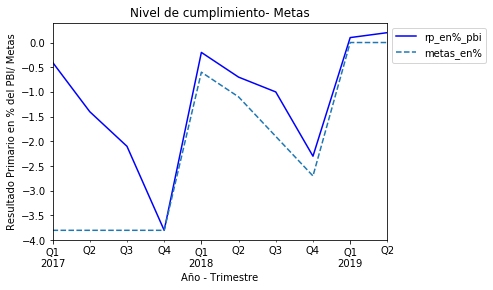

In [19]:
#reemplazo los pib de la tabla con los promedios calculados en "a"
for anio in range(2017,2020):
    pbi_rp.loc[pbi_rp.index.year==anio, "pib_precios_corrientes"]= pbi_prom.loc[anio,"pib_precios_corrientes"]
    
    
#NO FUNCIONA!!
# if pbi_rp.index.year==2016 :
#      pbi_rp["pib_precios_corrientes"]= a.loc[2016,"pib_precios_corrientes"]
# elif pbi_rp.index.year==2017 :
#      pbi_rp["pbi_precios_corrientes"]= a.loc[2017,"pib_precios_corrientes"]
# elif pbi_rp.index.year==2018 :
#      pbi_rp["pbi_precios_corrientes"]= a.loc[2018,"pib_precios_corrientes"]
# elif pbi_rp.index.year==2019 :
#      pbi_rp["pbi_precios_corrientes"]= a.loc[2019,"pib_precios_corrientes"]

   

#Ahora si, es posible calcular el rp en términos del pbi



pbi_rp["metas_en%"]= [ -3.8, -3.8, -3.8, -3.8, -0.6, -1.1, -1.9, -2.7, 0, 0 ]
pbi_rp["metas_en%"]= pd.to_numeric(pbi_rp["metas_en%"])
pbi_rp["metas_en%"]= pbi_rp["metas_en%"].astype("float64")
pbi_rp["rp_en%_pbi"]=round((pbi_rp["resultado_primario"] / pbi_rp["pib_precios_corrientes"]) *100,1)

a=pbi_rp.plot(y='rp_en%_pbi', title="Nivel de cumplimiento- Metas", color="blue", fontsize=10)
pbi_rp.plot(y='metas_en%',ax=a, style='--')
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("Resultado Primario en % del PBI/ Metas")
plt.xlabel("Año - Trimestre")

In [226]:
# trim= {1:"1T", 2:"1T", 3:"1T", 4:"2T", 5:"2T", 6:"2T", 7:"3T", 8:"3T", 9:"3T", 10:"4T", 11:"4T", 12:"4T"}
# RP["indice_tiempo"] = pd.to_datetime(RP["indice_tiempo"])
# mes = RP["indice_tiempo"].dt.month
# RP["trim"]= mes.apply(lambda x: trim[x])
# RP["trim_anio"]= RP["indice_tiempo"].dt.year.astype(str) + "-" + RP["trim"].astype(str)
# del RP["trim"]

# rp["anio_trim"]= rp.index.year.astype(str) + "-" + rp.index.quarter.astype(str)
# rp.head()



In [153]:
#plt.plot(RP.anio_trim, RP.resultado_primario, title="Resultado Primario - por trimestre")
#plt.xlabel("trimestre")
#plt.ylabel("resultado primario")